In [18]:
import os
from pathlib import Path
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from influence_moo.env.mission import Mission
from influence_moo.plotting import plot_mission, plot_rollout
from influence_moo.env.env import OceanEnv, AUV, ASV
from influence_moo.config import load_config
from influence_moo.evo.network import NeuralNetwork

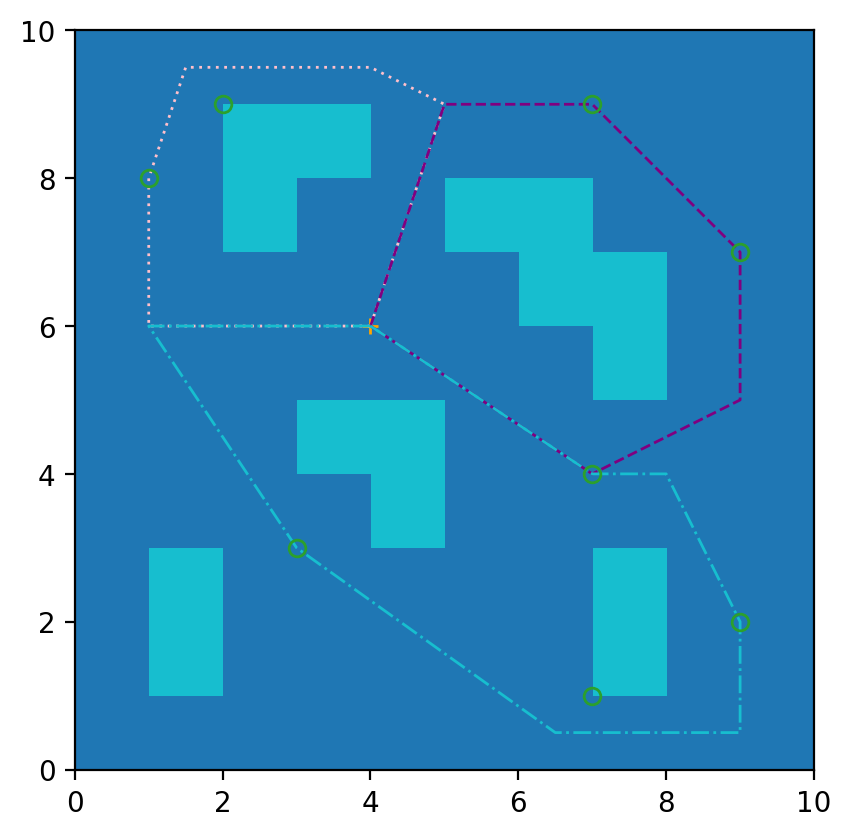

In [2]:
"""Load up the mission so we can see what the plan is"""
mission_dir = Path(os.getcwd()).parent / "results" / "bagel" / "aug_20_2024" / "mission"
mission = Mission(mission_dir)
fig, ax = plt.subplots(1,1,dpi=200)
plot_mission(mission,ax,include_waves=False)

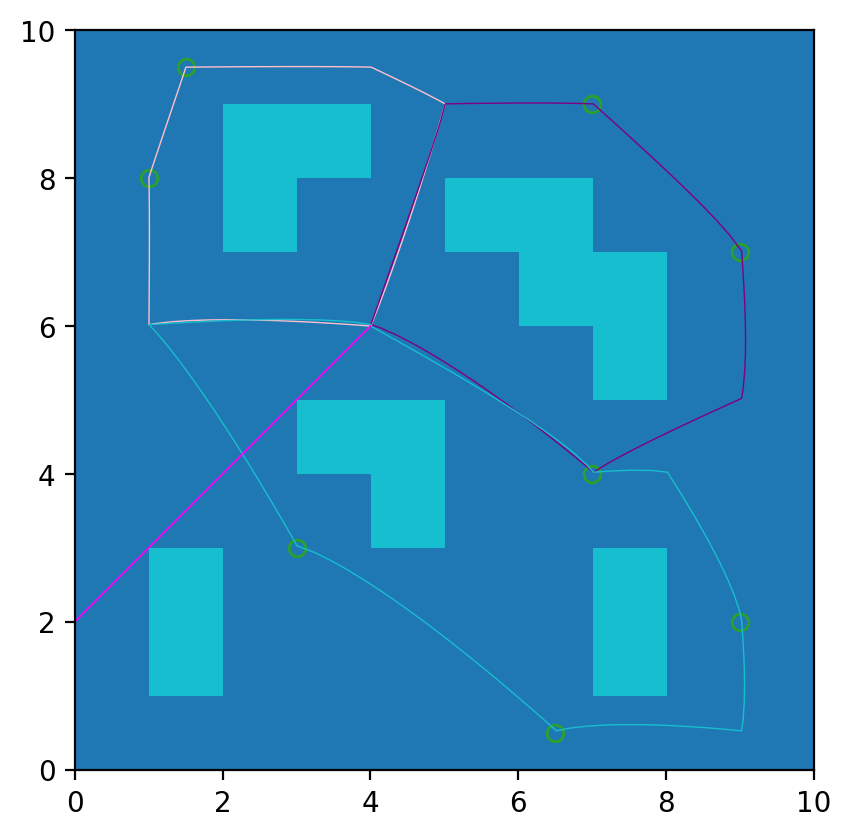

In [33]:
"""Set up an environment and see what happens with a random ASV policy"""
config = load_config('/home/gonzaeve/influence-multi-objective/results/bagel/aug_20_2024/1auv/G/config.yaml')
env = OceanEnv(config)
def bottom_left_policy(observation):
    return np.array([-1.,-1.])
# asv_network = NN(num_inputs=10+env.mission.connectivity_grid.size, num_hidden=[20,20], num_outputs = 2)
# env.run(asv_policy_functions=[bottom_left_policy])

# Run the env with perfect auv localization
env.auvs = [AUV(path, 1.) for path in env.mission.paths]
# for i in range(len(env.auvs)):
#     env.auvs[i].h_position = env.auvs[i].position

env.asvs = [
    ASV(
        position=env.mission.root_node[0].astype(float),
        auvs=env.auvs,
        connectivity_grid=env.mission.connectivity_grid,
        policy_function=bottom_left_policy
    )
    for _ in range(config["env"]["num_asvs"])
]

for _ in range(env.num_iterations):
    for i in range(len(env.auvs)):
        env.auvs[i].h_position = deepcopy(env.auvs[i].position)
    env.step()

fig, ax = plt.subplots(1,1,dpi=200)
plot_rollout(env, include_waves=False)